In [2]:
# Importar libs

# EDA
import pandas as pd
import pingouin as pg
import plotly.express as px
import plotly.figure_factory as ff
import matplotlib.pyplot as plt

# MACHINE LEARNING
from sklearn.model_selection import cross_validate, StratifiedKFold, cross_val_predict, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# OTIMIZAÇÃO DE HIPERPARÂMETROS
import optuna

In [3]:
# Carregar dataset
df_segmento = pd.read_csv('./datasets/empresas.csv')

In [4]:
df_segmento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   atividade_economica     500 non-null    object 
 1   faturamento_mensal      500 non-null    float64
 2   numero_de_funcionarios  500 non-null    int64  
 3   localizacao             500 non-null    object 
 4   idade                   500 non-null    int64  
 5   inovacao                500 non-null    int64  
 6   segmento_de_cliente     500 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 27.5+ KB


In [5]:
df_segmento.head(20)

,atividade_economica,faturamento_mensal,numero_de_funcionarios,localizacao,idade,inovacao,segmento_de_cliente
0,Comércio,713109.95,12,Rio de Janeiro,6,1,Bronze
1,Comércio,790714.38,9,São Paulo,15,0,Bronze
2,Comércio,1197239.33,17,São Paulo,4,9,Silver
3,Indústria,449185.78,15,São Paulo,6,0,Starter
4,Agronegócio,1006373.16,15,São Paulo,15,8,Silver
5,Serviços,1629562.41,16,Rio de Janeiro,11,4,Silver
6,Serviços,771179.95,13,Vitória,0,1,Starter
7,Serviços,707837.61,16,São Paulo,10,6,Silver
8,Comércio,888983.66,17,Belo Horizonte,10,1,Bronze
9,Indústria,1098512.64,13,Rio de Janeiro,9,3,Bronze


In [6]:
df_segmento.describe()

,faturamento_mensal,numero_de_funcionarios,idade,inovacao
count,5.000000e+02,500.000000,500.000000,500.00000
mean,1.026716e+06,13.690000,9.254000,4.38800
std,4.206095e+05,3.122403,2.959561,2.90281
min,1.842122e+04,2.000000,0.000000,0.00000
25%,7.632536e+05,12.000000,7.000000,2.00000
50%,1.022957e+06,14.000000,9.000000,4.00000
75%,1.295889e+06,16.000000,11.000000,7.00000
max,2.390677e+06,21.000000,16.000000,9.00000


# EDA

In [7]:
df_segmento['atividade_economica'].unique()

array(['Comércio', 'Indústria', 'Agronegócio', 'Serviços'], dtype=object)

In [8]:
df_segmento['localizacao'].unique()

array(['Rio de Janeiro', 'São Paulo', 'Vitória', 'Belo Horizonte'],
      dtype=object)

In [9]:
df_segmento['inovacao'].unique()

array([1, 0, 9, 8, 4, 6, 3, 7, 5, 2])

In [10]:
df_segmento['segmento_de_cliente'].unique()

array(['Bronze', 'Silver', 'Starter', 'Gold'], dtype=object)

In [11]:
df_segmento.sort_values(by=['segmento_de_cliente'])

,atividade_economica,faturamento_mensal,numero_de_funcionarios,localizacao,idade,inovacao,segmento_de_cliente
0,Comércio,713109.95,12,Rio de Janeiro,6,1,Bronze
290,Indústria,908289.25,16,Belo Horizonte,13,1,Bronze
289,Agronegócio,625599.74,15,Rio de Janeiro,7,2,Bronze
287,Serviços,1344366.16,12,Vitória,5,8,Bronze
282,Indústria,791704.75,13,Vitória,12,2,Bronze
...,...,...,...,...,...,...,...
187,Comércio,494926.48,16,Vitória,6,1,Starter
463,Serviços,25576.28,12,Rio de Janeiro,16,2,Starter
90,Agronegócio,226715.57,16,Belo Horizonte,9,0,Starter
54,Serviços,615848.03,15,São Paulo,3,0,Starter


In [16]:
df_segmento['numero_de_funcionarios'].groupby(df_segmento['segmento_de_cliente']).sum()

segmento_de_cliente
Bronze     2670
Gold        238
Silver     3679
Starter     258
Name: numero_de_funcionarios, dtype: int64

In [19]:
contagem_target = df_segmento.value_counts('segmento_de_cliente')
contagem_target

segmento_de_cliente
Silver     260
Bronze     202
Starter     22
Gold        16
Name: count, dtype: int64

In [20]:
lista_segmentos = ['Starter', 'Bronze', 'Silver', 'Gold']

In [22]:
px.bar(contagem_target, color=contagem_target.index, category_orders={'segmento_de_cliente': lista_segmentos})

In [25]:
percentual_target = contagem_target / len(df_segmento) * 100
percentual_target

segmento_de_cliente
Silver     52.0
Bronze     40.4
Starter     4.4
Gold        3.2
Name: count, dtype: float64

In [26]:
px.bar(percentual_target, color=percentual_target.index, category_orders={'segmento_de_cliente': lista_segmentos})

In [27]:
percentual_localizacao = df_segmento.value_counts('localizacao') / len(df_segmento) * 100
px.bar(percentual_localizacao, color=percentual_localizacao.index)

In [28]:
percentual_atividade = df_segmento.value_counts('atividade_economica') / len(df_segmento) * 100
px.bar(percentual_atividade, color=percentual_atividade.index)

In [29]:
percentual_inovacao = df_segmento.value_counts('inovacao') / len(df_segmento) * 100
px.bar(percentual_inovacao, color=percentual_inovacao.index)

In [30]:
# Tabela de Contingência entre localização e Target
crosstab_localizacao = pd.crosstab(df_segmento['localizacao'], df_segmento['segmento_de_cliente'], margins=True)[lista_segmentos].reset_index()
tabela_localizacao = ff.create_table(crosstab_localizacao)
tabela_localizacao.show()

In [31]:
# Tabela de Contingência entre atividade economica e Target
crosstab_atividade = pd.crosstab(df_segmento['atividade_economica'], df_segmento['segmento_de_cliente'], margins=True)[lista_segmentos].reset_index()
tabela_atividade = ff.create_table(crosstab_atividade)
tabela_atividade.show()

In [33]:
# Tabela de Contingência entre inovacao economica e Target
crosstab_inovacao = pd.crosstab(df_segmento['inovacao'], df_segmento['segmento_de_cliente'], margins=True)[lista_segmentos].reset_index()
tabela_inovacao = ff.create_table(crosstab_inovacao)
tabela_inovacao.show()

In [34]:
# Distribuição Idade da empresa
px.histogram(df_segmento, x='idade')

In [35]:
# Distribuição Faturamento Mensal
px.histogram(df_segmento, x='faturamento_mensal')

In [36]:
# Boxplot entre idade e Segmento
px.box(df_segmento, x='segmento_de_cliente', y='idade', color='segmento_de_cliente', category_orders={'segmento_de_cliente': lista_segmentos})

In [37]:
# Boxplot entre fat. mensal e segmento
px.box(df_segmento, x='segmento_de_cliente', y='faturamento_mensal', color='segmento_de_cliente', category_orders={'segmento_de_cliente': lista_segmentos})

In [38]:
# Teste de Qui-Quadrado de Pearson
# H0 - as variáveis são independentes
# H1 - as variáveis não são independentes
valor_esperado, valor_observado, estatisticas = pg.chi2_independence(df_segmento, 'segmento_de_cliente', 'localizacao')

/Users/brunoramoslemos/.local/share/virtualenvs/classificacao_arvore_decisao-Ib8DWj0q/lib/python3.11/site-packages/pingouin/contingency.py:151: UserWarning:

Low count on observed frequencies.

/Users/brunoramoslemos/.local/share/virtualenvs/classificacao_arvore_decisao-Ib8DWj0q/lib/python3.11/site-packages/pingouin/contingency.py:151: UserWarning:

Low count on expected frequencies.



In [40]:
# Valor esperado é a frequência que seria esperado se não houvesse associação entre as variáveis
# É calculado utilizadando a distribuição assumida no teste qui-quadrado
valor_esperado

localizacao,Belo Horizonte,Rio de Janeiro,São Paulo,Vitória
segmento_de_cliente,,,,
Bronze,44.844,52.924,48.884,55.348
Gold,3.552,4.192,3.872,4.384
Silver,57.720,68.120,62.920,71.240
Starter,4.884,5.764,5.324,6.028


In [41]:
# Valor observado
# Frequência real dos dados coletados
valor_observado

localizacao,Belo Horizonte,Rio de Janeiro,São Paulo,Vitória
segmento_de_cliente,,,,
Bronze,39,62,45,56
Gold,4,3,5,4
Silver,63,60,65,72
Starter,5,6,6,5


In [42]:
# Estatísticas. Analisar o pval que no caso é maior do que 0,05 portanto as variáveis são independetes
estatisticas

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,5.193351,9.0,0.817138,0.058841,0.113688
1,cressie-read,0.666667,5.191977,9.0,0.817262,0.058833,0.113668
2,log-likelihood,0.000000,5.197127,9.0,0.816797,0.058862,0.113742
3,freeman-tukey,-0.500000,5.207982,9.0,0.815814,0.058924,0.113898
4,mod-log-likelihood,-1.000000,5.224943,9.0,0.814275,0.059019,0.114141
5,neyman,-2.000000,5.277768,9.0,0.809453,0.059317,0.114900


In [46]:
valor_esperado, valor_observado, estatisticas = pg.chi2_independence(df_segmento, 'segmento_de_cliente', 'atividade_economica')

/Users/brunoramoslemos/.local/share/virtualenvs/classificacao_arvore_decisao-Ib8DWj0q/lib/python3.11/site-packages/pingouin/contingency.py:151: UserWarning:

Low count on observed frequencies.

/Users/brunoramoslemos/.local/share/virtualenvs/classificacao_arvore_decisao-Ib8DWj0q/lib/python3.11/site-packages/pingouin/contingency.py:151: UserWarning:

Low count on expected frequencies.

/Users/brunoramoslemos/.local/share/virtualenvs/classificacao_arvore_decisao-Ib8DWj0q/lib/python3.11/site-packages/scipy/stats/_stats_py.py:7661: RuntimeWarning:

divide by zero encountered in power

/Users/brunoramoslemos/.local/share/virtualenvs/classificacao_arvore_decisao-Ib8DWj0q/lib/python3.11/site-packages/scipy/stats/_stats_py.py:7661: RuntimeWarning:

invalid value encountered in multiply

/Users/brunoramoslemos/.local/share/virtualenvs/classificacao_arvore_decisao-Ib8DWj0q/lib/python3.11/site-packages/scipy/stats/_stats_py.py:7658: RuntimeWarning:

divide by zero encountered in divide



In [47]:
valor_esperado

atividade_economica,Agronegócio,Comércio,Indústria,Serviços
segmento_de_cliente,,,,
Bronze,47.672,56.156,49.288,48.884
Gold,3.776,4.448,3.904,3.872
Silver,61.360,72.280,63.440,62.920
Starter,5.192,6.116,5.368,5.324


In [48]:
valor_observado

atividade_economica,Agronegócio,Comércio,Indústria,Serviços
segmento_de_cliente,,,,
Bronze,47,56,50,49
Gold,7,5,4,0
Silver,57,75,63,65
Starter,7,3,5,7


In [49]:
estatisticas
# Variáveis também são independentes

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,9.969980,9.0,0.352921,0.081527,0.189483
1,cressie-read,0.666667,10.609948,9.0,0.303395,0.084103,0.200600
2,log-likelihood,0.000000,13.546371,9.0,0.139401,0.095031,0.253747
3,freeman-tukey,-0.500000,NaN,9.0,NaN,NaN,NaN
4,mod-log-likelihood,-1.000000,inf,9.0,0.000000,inf,NaN
5,neyman,-2.000000,NaN,9.0,NaN,NaN,NaN


In [50]:
valor_esperado, valor_observado, estatisticas = pg.chi2_independence(df_segmento, 'segmento_de_cliente', 'inovacao')

/Users/brunoramoslemos/.local/share/virtualenvs/classificacao_arvore_decisao-Ib8DWj0q/lib/python3.11/site-packages/pingouin/contingency.py:151: UserWarning:

Low count on observed frequencies.

/Users/brunoramoslemos/.local/share/virtualenvs/classificacao_arvore_decisao-Ib8DWj0q/lib/python3.11/site-packages/pingouin/contingency.py:151: UserWarning:

Low count on expected frequencies.

/Users/brunoramoslemos/.local/share/virtualenvs/classificacao_arvore_decisao-Ib8DWj0q/lib/python3.11/site-packages/scipy/stats/_stats_py.py:7661: RuntimeWarning:

divide by zero encountered in power

/Users/brunoramoslemos/.local/share/virtualenvs/classificacao_arvore_decisao-Ib8DWj0q/lib/python3.11/site-packages/scipy/stats/_stats_py.py:7661: RuntimeWarning:

invalid value encountered in multiply

/Users/brunoramoslemos/.local/share/virtualenvs/classificacao_arvore_decisao-Ib8DWj0q/lib/python3.11/site-packages/scipy/stats/_stats_py.py:7658: RuntimeWarning:

divide by zero encountered in divide



In [51]:
valor_esperado

inovacao,0,1,2,3,4,5,6,7,8,9
segmento_de_cliente,,,,,,,,,,
Bronze,21.008,23.028,22.624,19.392,17.372,17.372,21.816,21.412,18.988,18.988
Gold,1.664,1.824,1.792,1.536,1.376,1.376,1.728,1.696,1.504,1.504
Silver,27.040,29.640,29.120,24.960,22.360,22.360,28.080,27.560,24.440,24.440
Starter,2.288,2.508,2.464,2.112,1.892,1.892,2.376,2.332,2.068,2.068


In [52]:
valor_observado

inovacao,0,1,2,3,4,5,6,7,8,9
segmento_de_cliente,,,,,,,,,,
Bronze,36,44,32,22,12,14,15,12,9,6
Gold,0,0,0,0,0,3,0,5,4,4
Silver,10,5,20,25,30,25,38,36,34,37
Starter,6,8,4,1,1,1,1,0,0,0


In [56]:
estatisticas.round(10)
# As variáveis inovacao e segmento_de_cliente não são independentes 

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,164.293991,27.0,0.0,0.330952,0.998500
1,cressie-read,0.666667,165.499463,27.0,0.0,0.332164,0.998612
2,log-likelihood,0.000000,181.488777,27.0,0.0,0.347840,0.999514
3,freeman-tukey,-0.500000,NaN,27.0,NaN,NaN,NaN
4,mod-log-likelihood,-1.000000,inf,27.0,0.0,inf,NaN
5,neyman,-2.000000,NaN,27.0,NaN,NaN,NaN


# TREINAMENTO DO MODELO

In [57]:
X = df_segmento.drop(columns=['segmento_de_cliente'])
y = df_segmento['segmento_de_cliente']

## Criar Pipeline de treinamento

In [60]:
# OneHotEncode nas variaveis categoricas
categorical_features = ['atividade_economica', 'localizacao']

# Tranformer
categorical_transformer = Pipeline(steps=[
  ('imputer', SimpleImputer(strategy='most_frequent')),
  ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
  transformers=[
    ('cat', categorical_transformer, categorical_features)
  ]
)

# Pipeline com preprocessor e modelo de arvore
dt_model = Pipeline(steps=[
  ('preprocessor', preprocessor),
  ('classifier', DecisionTreeClassifier())
])

## Validação cruzada

In [61]:
# Dado que as classes da variável target estão desbalanceadas, usaremos uma estratégia de validação cruzada, usando StratifiedKFold
cv_folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=51)
metrics_result = cross_validate(dt_model, X, y, cv=cv_folds, scoring=['accuracy'], return_estimator=True)

In [62]:
# Mostrar retorno do Cross-Validation
metrics_result

{'fit_time': array([0.00996304, 0.00340605, 0.0024519 ]),
 'score_time': array([0.00207186, 0.00139809, 0.0012691 ]),
 'estimator': [Pipeline(steps=[('preprocessor',
                   ColumnTransformer(transformers=[('cat',
                                                    Pipeline(steps=[('imputer',
                                                                     SimpleImputer(strategy='most_frequent')),
                                                                    ('onehot',
                                                                     OneHotEncoder(handle_unknown='ignore'))]),
                                                    ['atividade_economica',
                                                     'localizacao'])])),
                  ('classifier', DecisionTreeClassifier())]),
  Pipeline(steps=[('preprocessor',
                   ColumnTransformer(transformers=[('cat',
                                                    Pipeline(steps=[('imputer',
        

## Métricas

In [63]:
# Fazendo predições
y_pred = cross_val_predict(dt_model, X, y, cv=cv_folds)

In [64]:
# Avaliar o desempenho do modelo
classification_report_str = classification_report(y, y_pred)
classification_report_str

/Users/brunoramoslemos/.local/share/virtualenvs/classificacao_arvore_decisao-Ib8DWj0q/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/brunoramoslemos/.local/share/virtualenvs/classificacao_arvore_decisao-Ib8DWj0q/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/brunoramoslemos/.local/share/virtualenvs/classificacao_arvore_decisao-Ib8DWj0q/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



'              precision    recall  f1-score   support\n\n      Bronze       0.41      0.36      0.38       202\n        Gold       0.00      0.00      0.00        16\n      Silver       0.51      0.63      0.57       260\n     Starter       0.00      0.00      0.00        22\n\n    accuracy                           0.47       500\n   macro avg       0.23      0.25      0.24       500\nweighted avg       0.43      0.47      0.45       500\n'

In [66]:
print(f'{classification_report_str}')

              precision    recall  f1-score   support

      Bronze       0.41      0.36      0.38       202
        Gold       0.00      0.00      0.00        16
      Silver       0.51      0.63      0.57       260
     Starter       0.00      0.00      0.00        22

    accuracy                           0.47       500
   macro avg       0.23      0.25      0.24       500
weighted avg       0.43      0.47      0.45       500



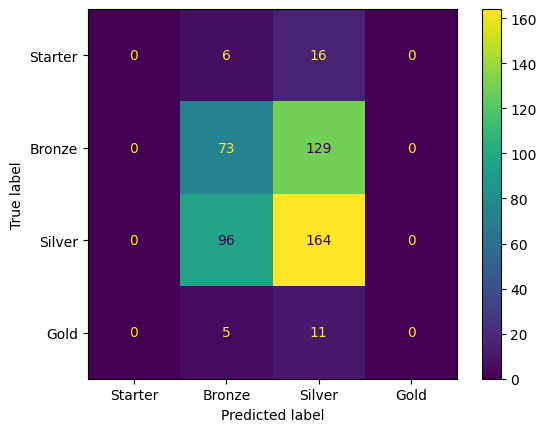

In [67]:
# Mostrar Matriz de Confusão
confusion_matrix_model = confusion_matrix(y, y_pred, labels=lista_segmentos)
disp = ConfusionMatrixDisplay(confusion_matrix_model, display_labels=lista_segmentos)
disp.plot()

## TUNING DE HIPERPARÂMETROS

In [68]:
# Ajustar hiperparâmetros do Modelo usando Optuna
# min_samples_leaf = Mínimo de instâncias requeridopara formar uma folha (nó terminal)
# max_depth = Profundidade da arvore

def decisiontree_optuna(trial):
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
  max_depth = trial.suggest_int('max_depth',2, 8)
  dt_model.set_params(classifier__min_samples_leaf=min_samples_leaf)
  dt_model.set_params(classifier__max_depth=max_depth)
  
  scores = cross_val_score(dt_model, X, y, cv=cv_folds, scoring='accuracy')
  
  return scores.mean()

In [69]:
# Executar a automação de experimentos
estudo_decisiontree = optuna.create_study(direction='maximize')
estudo_decisiontree.optimize(decisiontree_optuna, n_trials=100)

[I 2024-06-27 18:15:36,301] A new study created in memory with name: no-name-46744e25-368e-422f-8325-e65a64a28a54
[I 2024-06-27 18:15:36,320] Trial 0 finished with value: 0.4679676790996321 and parameters: {'min_samples_leaf': 19, 'max_depth': 6}. Best is trial 0 with value: 0.4679676790996321.
[I 2024-06-27 18:15:36,333] Trial 1 finished with value: 0.4740518962075848 and parameters: {'min_samples_leaf': 4, 'max_depth': 2}. Best is trial 1 with value: 0.4740518962075848.
[I 2024-06-27 18:15:36,346] Trial 2 finished with value: 0.46997571122814613 and parameters: {'min_samples_leaf': 17, 'max_depth': 7}. Best is trial 1 with value: 0.4740518962075848.
[I 2024-06-27 18:15:36,378] Trial 3 finished with value: 0.45398359906692637 and parameters: {'min_samples_leaf': 14, 'max_depth': 5}. Best is trial 1 with value: 0.4740518962075848.
[I 2024-06-27 18:15:36,403] Trial 4 finished with value: 0.45398359906692637 and parameters: {'min_samples_leaf': 10, 'max_depth': 5}. Best is trial 1 with v

In [71]:
# Mestrar melhor resultado e melhor conjunto de hiperparâmetros
estudo_decisiontree.best_value

0.4740518962075848

In [72]:
estudo_decisiontree.best_params

{'min_samples_leaf': 4, 'max_depth': 2}

## VISUALIZAR ÁRVORE

In [74]:
X_train_tree = X.copy()
X_train_tree['localizacao_label'] = X_train_tree.localizacao.astype('category').cat.codes
X_train_tree['atividade_economica_label'] = X_train_tree.atividade_economica.astype('category').cat.codes
X_train_tree.drop(columns=['localizacao', 'atividade_economica'], axis=1, inplace=True)
X_train_tree.rename(columns={'localizacao_label' : 'localizacao', 'atividade_economica_label' : 'atividade_economica'}, inplace=True)
X_train_tree.head(10)

,faturamento_mensal,numero_de_funcionarios,idade,inovacao,localizacao,atividade_economica
0,713109.95,12,6,1,1,1
1,790714.38,9,15,0,2,1
2,1197239.33,17,4,9,2,1
3,449185.78,15,6,0,2,2
4,1006373.16,15,15,8,2,0
5,1629562.41,16,11,4,1,3
6,771179.95,13,0,1,3,3
7,707837.61,16,10,6,2,3
8,888983.66,17,10,1,0,1
9,1098512.64,13,9,3,1,2


In [75]:
# Treinar o modelo com o conjunto de hiperparâmetros ideal
clf_decisiontree = DecisionTreeClassifier(min_samples_leaf=estudo_decisiontree.best_params['min_samples_leaf'], max_depth=estudo_decisiontree.best_params['max_depth'])

y_train_tree = y.copy()

clf_decisiontree.fit(X_train_tree, y_train_tree)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=4)

[Text(0.5, 0.8333333333333334, 'inovacao <= 2.5\ngini = 0.563\nsamples = 500\nvalue = [202, 16, 260, 22]\nclass = Silver'),
 Text(0.25, 0.5, 'faturamento_mensal <= 425959.422\ngini = 0.482\nsamples = 165\nvalue = [112, 0, 35, 18]\nclass = Starter'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.26\nsamples = 13\nvalue = [2, 0, 0, 11]\nclass = Gold'),
 Text(0.375, 0.16666666666666666, 'gini = 0.421\nsamples = 152\nvalue = [110, 0, 35, 7]\nclass = Starter'),
 Text(0.75, 0.5, 'faturamento_mensal <= 549601.438\ngini = 0.474\nsamples = 335\nvalue = [90.0, 16.0, 225.0, 4.0]\nclass = Silver'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.459\nsamples = 37\nvalue = [26, 0, 7, 4]\nclass = Starter'),
 Text(0.875, 0.16666666666666666, 'gini = 0.416\nsamples = 298\nvalue = [64.0, 16.0, 218.0, 0.0]\nclass = Silver')]

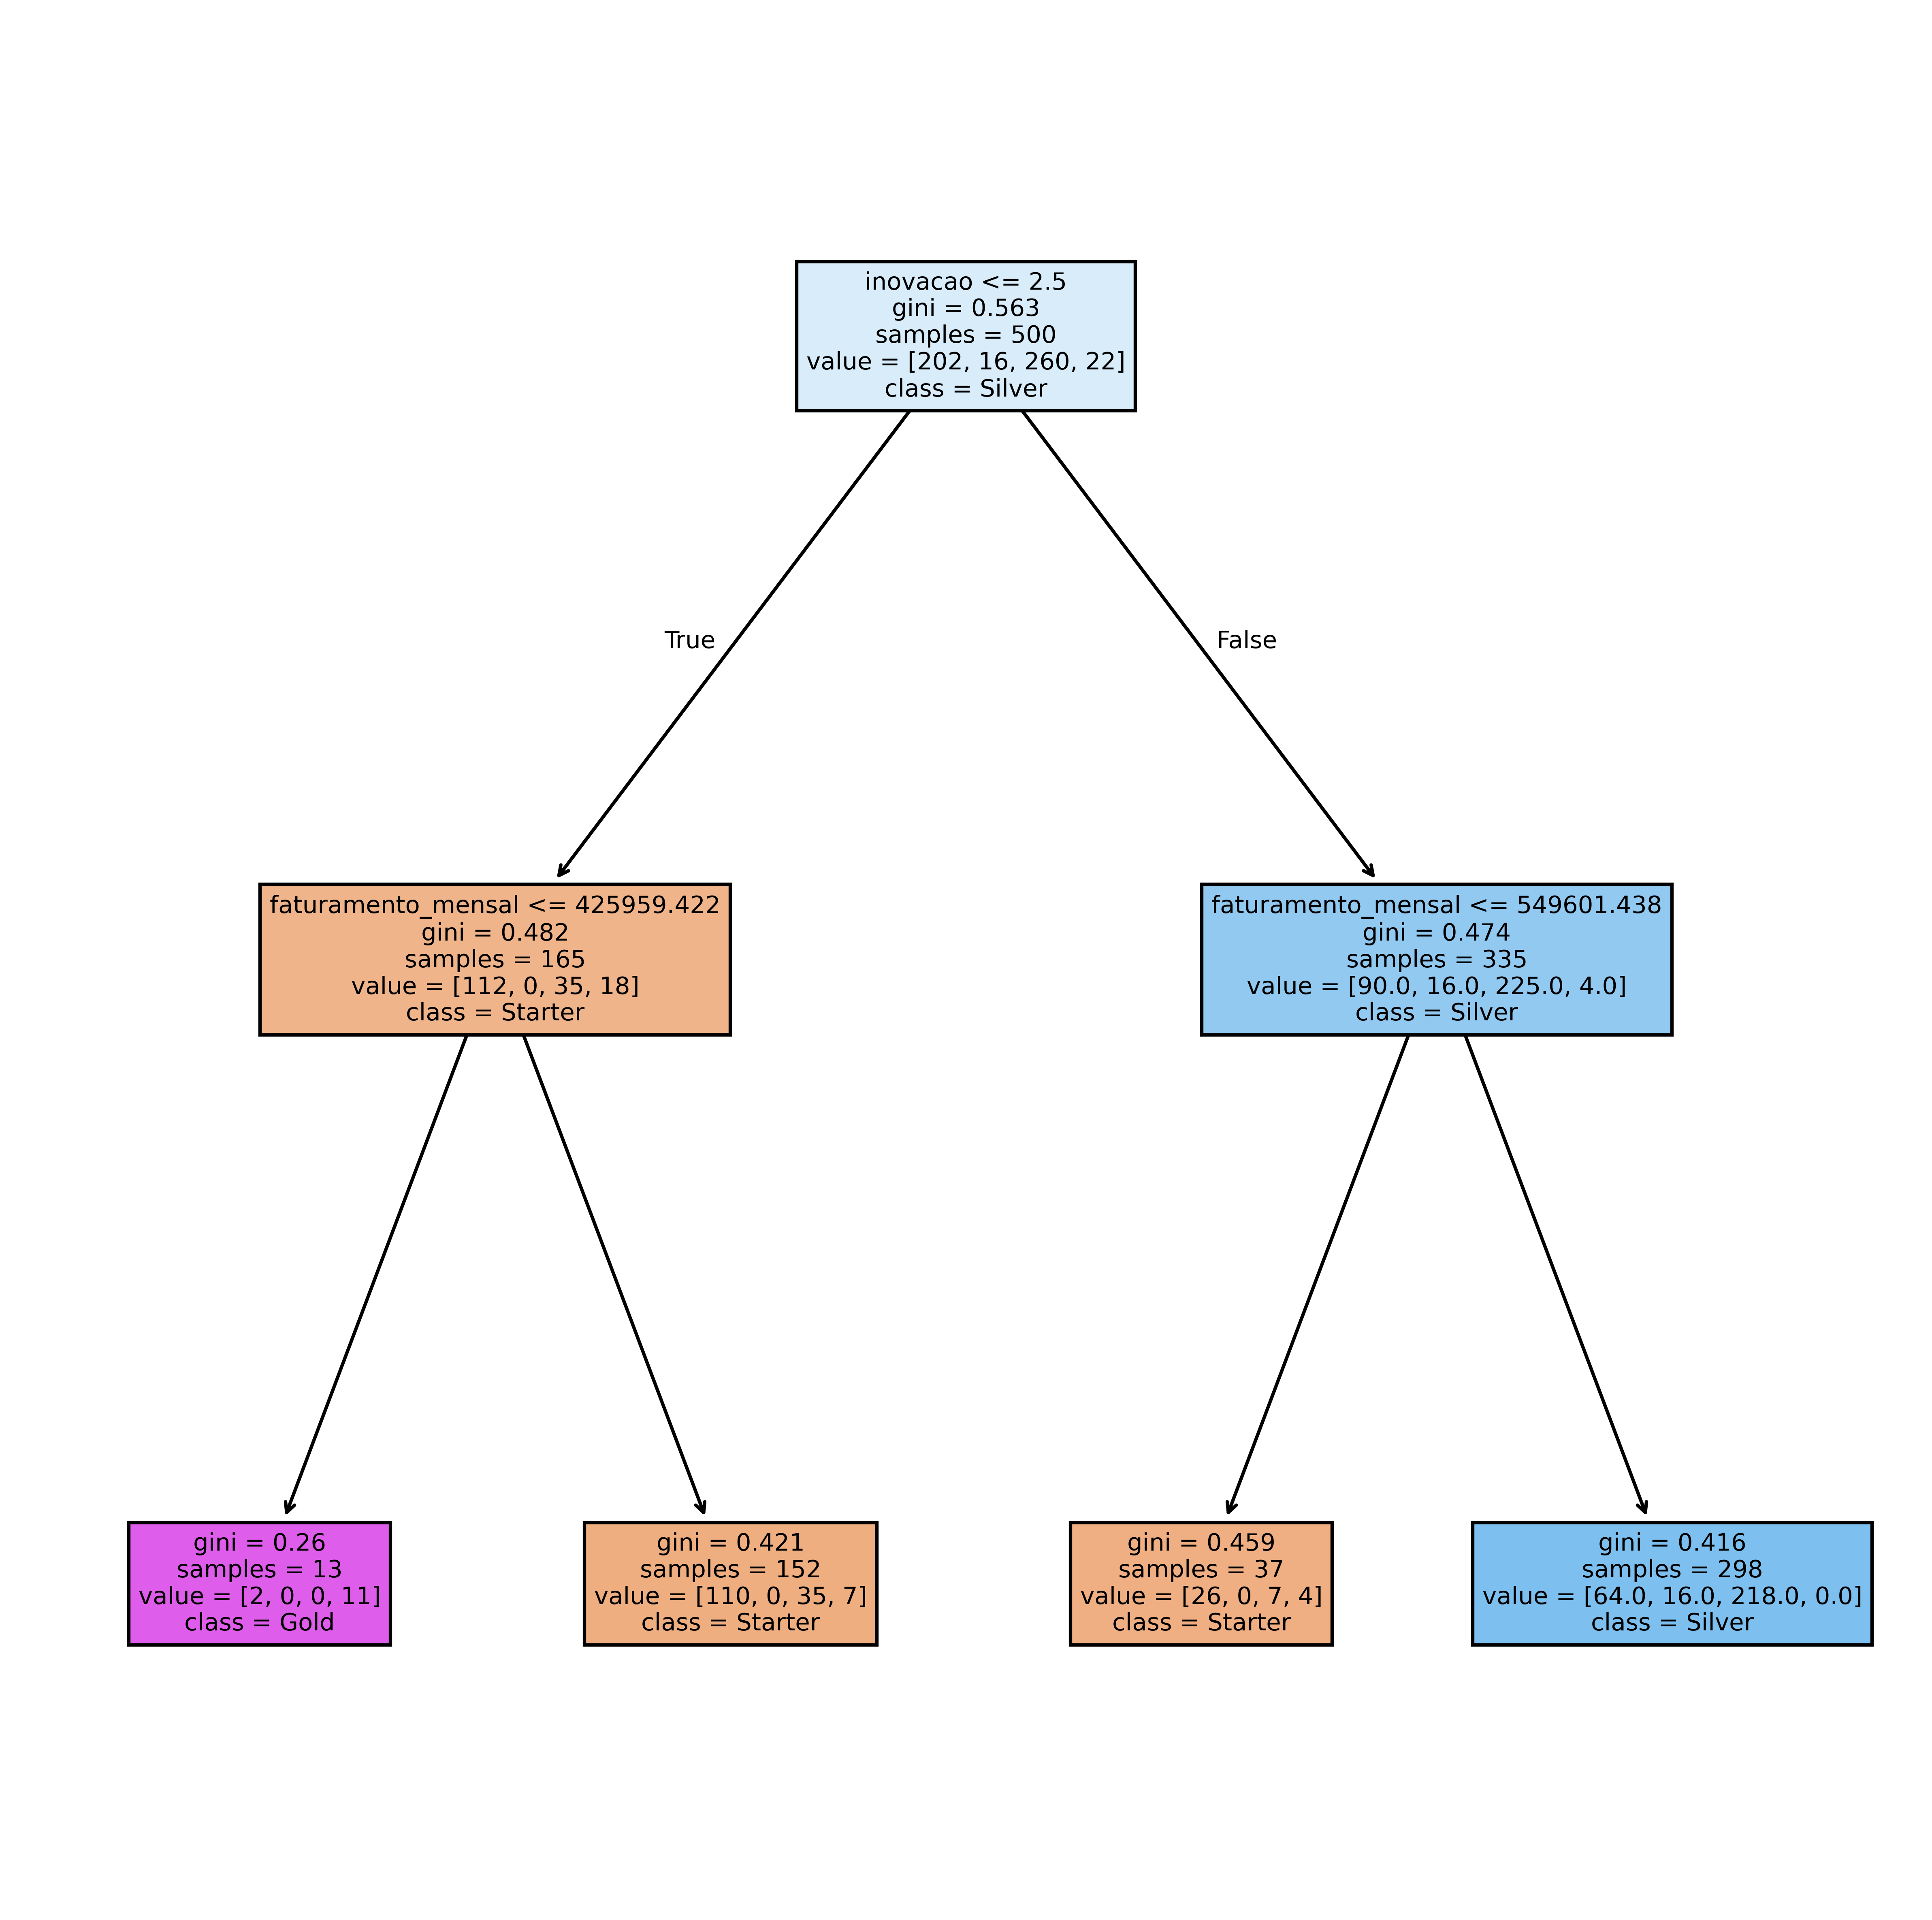

In [76]:
# Visualizar arvore de decisão resultante do treinamento
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,10), dpi=600)
plot_tree(clf_decisiontree, feature_names=X_train_tree.columns.to_numpy(), class_names=lista_segmentos, filled=True)

## Salvar modelo

In [77]:
# Criar um pipeline tunado
import joblib

dt_model_tunado = Pipeline(steps=[
  ('preprocessor', preprocessor),
  ('classifier', DecisionTreeClassifier(
      min_samples_leaf=estudo_decisiontree.best_params['min_samples_leaf'], 
      max_depth=estudo_decisiontree.best_params['max_depth']))
])

dt_model_tunado.fit(X, y)

joblib.dump(dt_model_tunado, 'modelo_classificacao_decision_tree.pkl')

['modelo_classificacao_decision_tree.pkl']

## ENTREGAR MODELO COMO APP DE PREDIÇÃO BATCH POR ARQUIVO

In [79]:
import gradio as gr

modelo = joblib.load('./modelo_classificacao_decision_tree.pkl')
def predict(arquivo):
  df_empresas = pd.read_csv(arquivo.name)
  y_pred = modelo.predict(df_empresas)
  df_segmentos = pd.DataFrame(y_pred, columns=['segmento_de_cliente'])
  df_predicoes = pd.concat([df_empresas, df_segmentos])
  df_predicoes.to_csv('./predicoes.csv', index=True)
  return ',/predicoes.csv'

demo = gr.Interface(
  predict,
  gr.File(file_types=[".csv"]),
  "file"
)

demo.launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


Traceback (most recent call last):
  File "/Users/brunoramoslemos/.local/share/virtualenvs/classificacao_arvore_decisao-Ib8DWj0q/lib/python3.11/site-packages/gradio/queueing.py", line 541, in process_events
    response = await route_utils.call_process_api(
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/brunoramoslemos/.local/share/virtualenvs/classificacao_arvore_decisao-Ib8DWj0q/lib/python3.11/site-packages/gradio/route_utils.py", line 276, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/brunoramoslemos/.local/share/virtualenvs/classificacao_arvore_decisao-Ib8DWj0q/lib/python3.11/site-packages/gradio/blocks.py", line 1938, in process_api
    data = await self.postprocess_data(block_fn, result["prediction"], state)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/brunoramoslemos/.local/share/virtualenvs/classificacao_arvore_decisao-Ib8DWj0